In [5]:
# Importing Library 
import warnings
warnings.filterwarnings('ignore')

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns, objective_functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfolio

In [6]:
tickers = ['SIE', 'DTE', 'ALV', 'MRK', 'DHL']

In [7]:
# Split the Data into Training and Test set
# Set date variable
start_date = '2010-01-04' # Start date of training set
end_date = '2020-10-08' # End date of training set
test_start_date = '2020-10-09' # End date of test set
test_end_date = '2023-06-30' # End date of test set

In [8]:
df1 = pd.read_csv("RandomForest_1 feature.csv")
df2 = pd.read_csv("RandomForest_2 feature.csv")
df3 = pd.read_csv("RandomForest_3 feature.csv")

In [9]:
actual_returns = pd.read_csv("actual_returns.csv", index_col=[0])
actual_test = pd.read_csv("actual_test.csv")

In [10]:
actual_test

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,29.719999
1,88.153114,12.755207,170.705826,98.225822,29.760000
2,88.775276,12.941236,173.379425,99.027473,30.315001
3,89.521896,12.929710,173.095856,99.970581,30.395000
4,87.922020,13.040010,174.473190,100.253517,30.520000
...,...,...,...,...,...
942,155.479996,19.695999,209.199997,152.600006,43.000000
943,157.559998,19.906000,211.300003,147.199997,43.500000
944,152.720001,20.030001,211.649994,150.500000,44.305000
945,150.580002,19.930000,211.050003,149.600006,44.195000


In [11]:
actual_returns

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.006496,-0.003806,0.002743,0.004987,0.007566
2020-10-12,0.007888,0.006599,0.010111,0.000000,0.000485
2020-10-13,-0.010673,0.003106,-0.019548,-0.003435,0.004116
2020-10-14,0.010428,-0.004128,0.003003,-0.016852,0.011575
2020-10-15,-0.027224,-0.031434,-0.028619,-0.035450,-0.029559
...,...,...,...,...,...
2023-06-26,-0.009555,0.007056,0.000239,-0.002288,-0.004399
2023-06-27,0.013378,0.010662,0.010038,-0.035387,0.011628
2023-06-28,-0.030718,0.006229,0.001656,0.022418,0.018506


# 1 Base scenario (2 features)

In [12]:
df2.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [13]:
df2.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [14]:
df2.set_index('Date', inplace=True)
df2

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,109.206144,13.713999,186.883575,124.493935,40.525501,Y
2023-06-27,109.206144,13.713999,186.883575,124.493935,40.525501,Y
2023-06-28,109.206144,13.713999,186.883575,124.493935,40.525501,Y


The forecast-prices-1.csv is included actual prices in train period and forecasted prices in test period.

In [15]:
# Split data set to training set and test set
train = df2.loc[:end_date] # this is actual prices
test = df2.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [16]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,101.783288,13.062448,143.785580,124.493935,40.554221,Y
2020-10-12,102.963309,12.889090,144.079550,124.493935,40.554221,Y
2020-10-13,103.482678,13.113780,145.238811,124.493935,40.554221,Y
2020-10-14,102.035049,13.163394,144.320053,124.493935,40.554221,Y
2020-10-15,103.444595,13.089672,143.805169,124.432175,40.554221,Y
...,...,...,...,...,...,...
2023-06-26,109.206144,13.713999,186.883575,124.493935,40.525501,Y
2023-06-27,109.206144,13.713999,186.883575,124.493935,40.525501,Y
2023-06-28,109.206144,13.713999,186.883575,124.493935,40.525501,Y


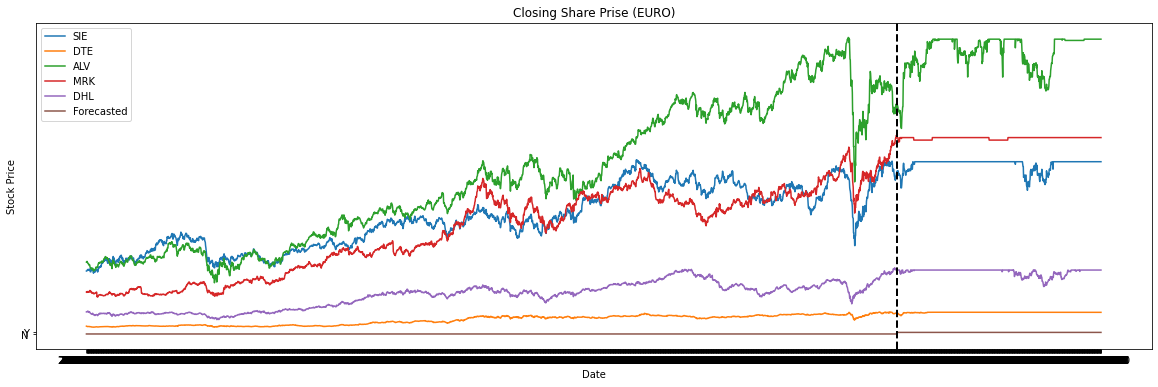

In [17]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df2.columns:
    plt.plot(df2.index, df2[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [18]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df2.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [19]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df2 = df2[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns2 = forecast_returns_df2.iloc[start:]
forecast_returns2 = forecast_returns2.reset_index(drop=True)

In [20]:
forecast_returns2

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,0.000000,0.000000,0.000000,0.000000,0.000000
943,0.000000,0.000000,0.000000,0.000000,0.000000
944,0.000000,0.000000,0.000000,0.000000,0.000000
945,0.000000,0.000000,0.000000,0.000000,0.000000


## 1.1 Maximize the Sharpe ratio

In [21]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_2 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_2.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]

    portfolio_weights_min_var_2[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

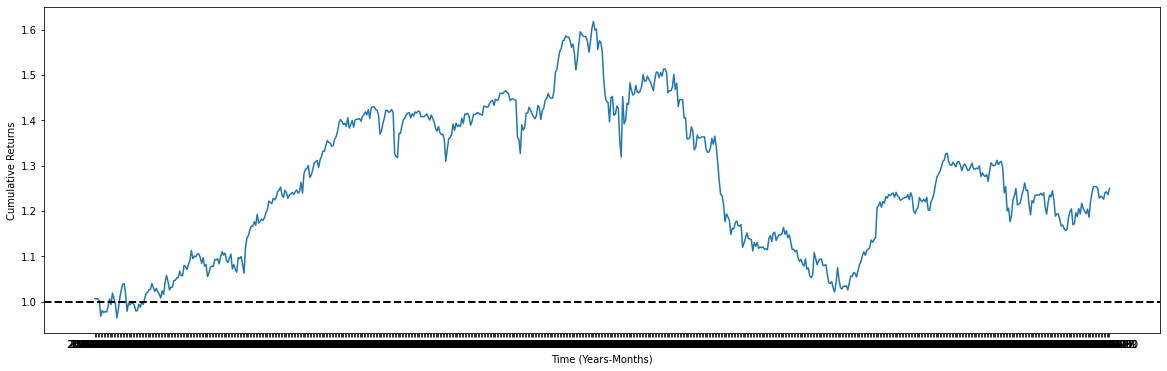

In [22]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_2 = np.sum(actual_returns.multiply(portfolio_weights_min_var_2), axis=1)
cumulative_returns_daily_min_var_2 = (1 + return_stocks_min_var_2).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_2)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [23]:
# Calculate portfolio variance
portfolio_variance_min_var_2 = np.dot(portfolio_weights_min_var_2[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_2[-1]))
portfolio_variance_min_var_2

0.00018911943285314375

In [24]:
# Calculate standard deviation
std_min_var_2 = np.sqrt(portfolio_variance_min_var_2)
std_min_var_2

0.013752070129734787

In [25]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_2[-1]

1.2496640953969476

In [26]:
# Check negative weights
np.any(portfolio_weights_min_var_2 < 0)

False

In [27]:
return_stocks_min_var_2.index = pd.to_datetime(return_stocks_min_var_2.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,8.417%
Cumulative returns,24.966%
Annual volatility,21.866%
Sharpe ratio,0.48
Calmar ratio,0.23
Stability,0.01
Max drawdown,-36.881%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,36.88,2022-02-09,2022-09-30,NaT,NaN
1,9.45,2021-11-16,2021-11-30,2022-01-04,36
2,8.44,2021-07-12,2021-09-20,2021-10-26,77
3,5.86,2020-11-06,2020-11-10,2020-12-03,20
4,5.38,2020-10-27,2020-10-30,2020-11-04,7


Stress Events,mean,min,max
New Normal,0.04%,-6.27%,10.12%


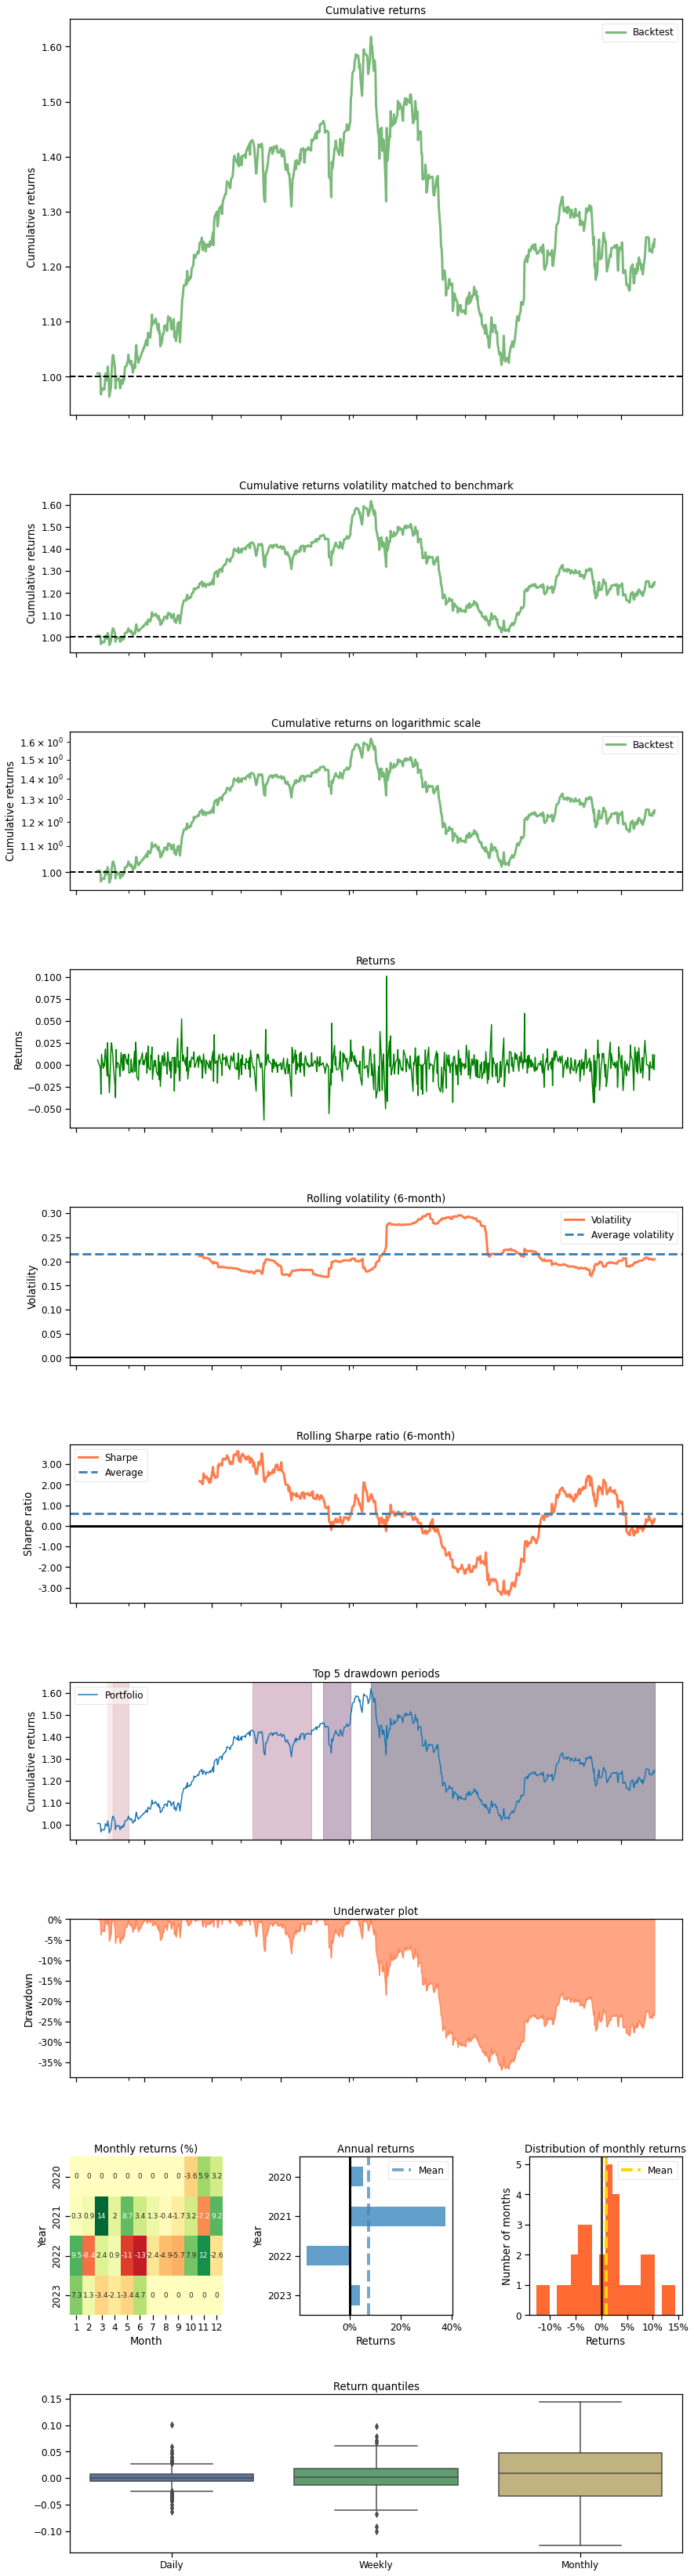

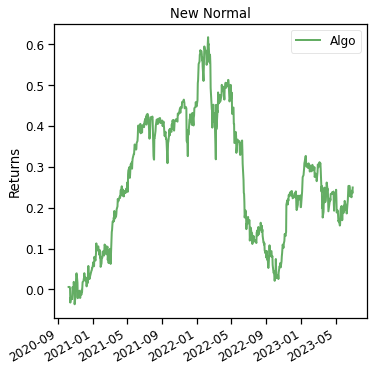

In [28]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_2, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

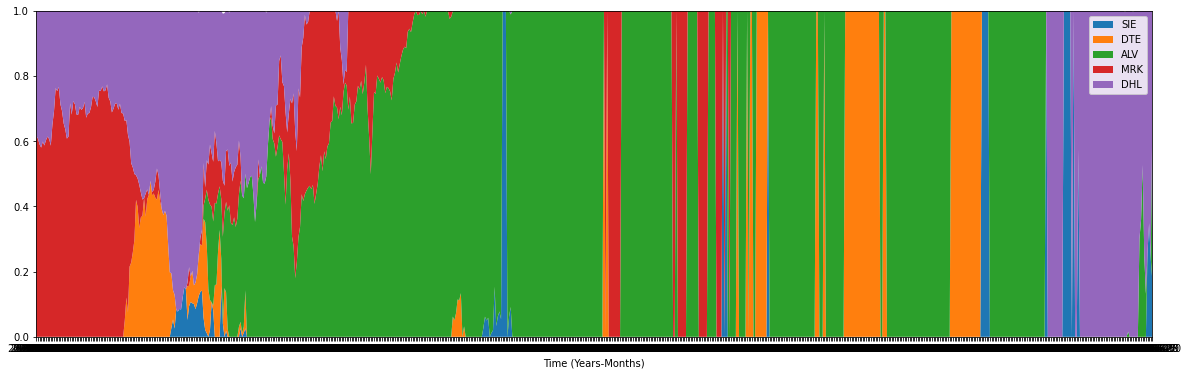

In [29]:
df_plot = pd.DataFrame (portfolio_weights_min_var_2, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [30]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.0,0.00000,0.61588,0.38412
2020-10-12,0.00000,0.0,0.00000,0.60759,0.39241
2020-10-13,0.00000,0.0,0.00000,0.59031,0.40969
2020-10-14,0.00000,0.0,0.00000,0.58016,0.41984
2020-10-15,0.00000,0.0,0.00000,0.59871,0.40129
...,...,...,...,...,...
2023-06-26,0.00000,0.0,0.13187,0.00000,0.86813
2023-06-27,0.25810,0.0,0.00000,0.00000,0.74183
2023-06-28,0.34817,0.0,0.00000,0.00000,0.65183


In [31]:
df_plot.to_csv('RandomForest_min_var_2.csv', index=True)

## 1.2 Minimize the volatility

In [32]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df2.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [33]:
data

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,32.020000
1,88.153107,12.755207,170.705811,98.225822,32.090000
2,88.775276,12.941236,173.379425,99.027466,32.095001
3,89.521896,12.929710,173.095856,99.970581,31.940001
4,87.922012,13.040010,174.473190,100.253525,31.750000
...,...,...,...,...,...
942,109.206144,13.713999,186.883575,124.493935,40.525501
943,109.206144,13.713999,186.883575,124.493935,40.525501
944,109.206144,13.713999,186.883575,124.493935,40.525501
945,109.206144,13.713999,186.883575,124.493935,40.525501


In [34]:
actual_test

,SIE,DTE,ALV,MRK,DHL
0,88.108665,12.722281,172.650269,97.990036,29.719999
1,88.153114,12.755207,170.705826,98.225822,29.760000
2,88.775276,12.941236,173.379425,99.027473,30.315001
3,89.521896,12.929710,173.095856,99.970581,30.395000
4,87.922020,13.040010,174.473190,100.253517,30.520000
...,...,...,...,...,...
942,155.479996,19.695999,209.199997,152.600006,43.000000
943,157.559998,19.906000,211.300003,147.199997,43.500000
944,152.720001,20.030001,211.649994,150.500000,44.305000
945,150.580002,19.930000,211.050003,149.600006,44.195000


In [35]:
# Perform Minimum variance optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_vol_2 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_vol_2.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
     
    weights = ef.min_volatility()
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]
   
    portfolio_weights_min_vol_2[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

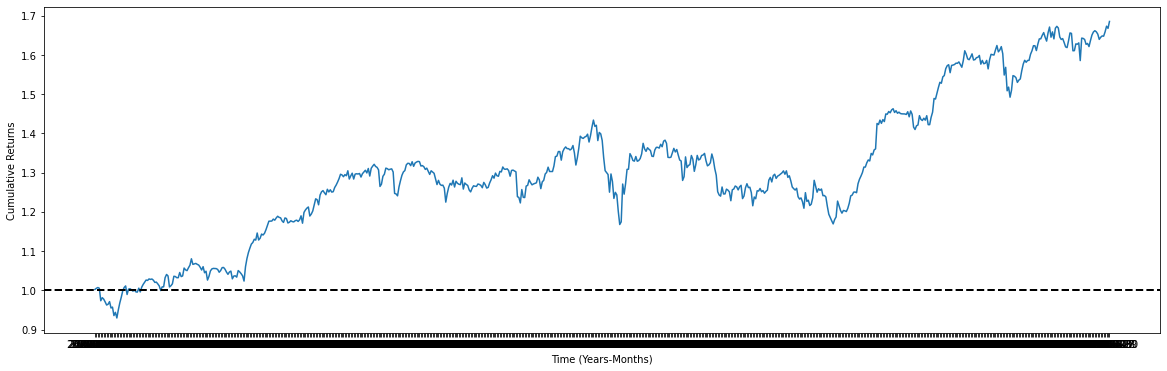

In [36]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_vol_2 = np.sum(actual_returns.multiply(portfolio_weights_min_vol_2), axis=1)
cumulative_returns_daily_min_vol_2 = (1 + return_stocks_min_vol_2).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_vol_2)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [37]:
# Calculate portfolio variance
portfolio_variance_min_vol_2 = np.dot(portfolio_weights_min_vol_2[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_vol_2[-1]))
portfolio_variance_min_vol_2

0.000152612675155581

In [38]:
# Calculate standard deviation
std_min_vol_2 = np.sqrt(portfolio_variance_min_vol_2)
std_min_vol_2

0.012353650276561216

In [39]:
# Calculate porfolio returns
cumulative_returns_daily_min_vol_2[-1]

1.6853435283515987

In [40]:
# Check negative weights
np.any(portfolio_variance_min_vol_2 < 0)

False

In [41]:
return_stocks_min_vol_2.index = pd.to_datetime(return_stocks_min_vol_2.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,20.836%
Cumulative returns,68.534%
Annual volatility,18.533%
Sharpe ratio,1.11
Calmar ratio,1.12
Stability,0.75
Max drawdown,-18.566%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,18.57,2022-02-09,2022-03-07,2022-11-16,201
1,8.11,2023-03-06,2023-03-17,2023-04-18,32
2,7.97,2021-08-24,2021-11-30,2022-01-04,96
3,7.71,2020-10-13,2020-10-30,2020-11-06,19
4,6.08,2021-07-13,2021-08-04,2021-08-13,24


Stress Events,mean,min,max
New Normal,0.08%,-4.87%,8.21%


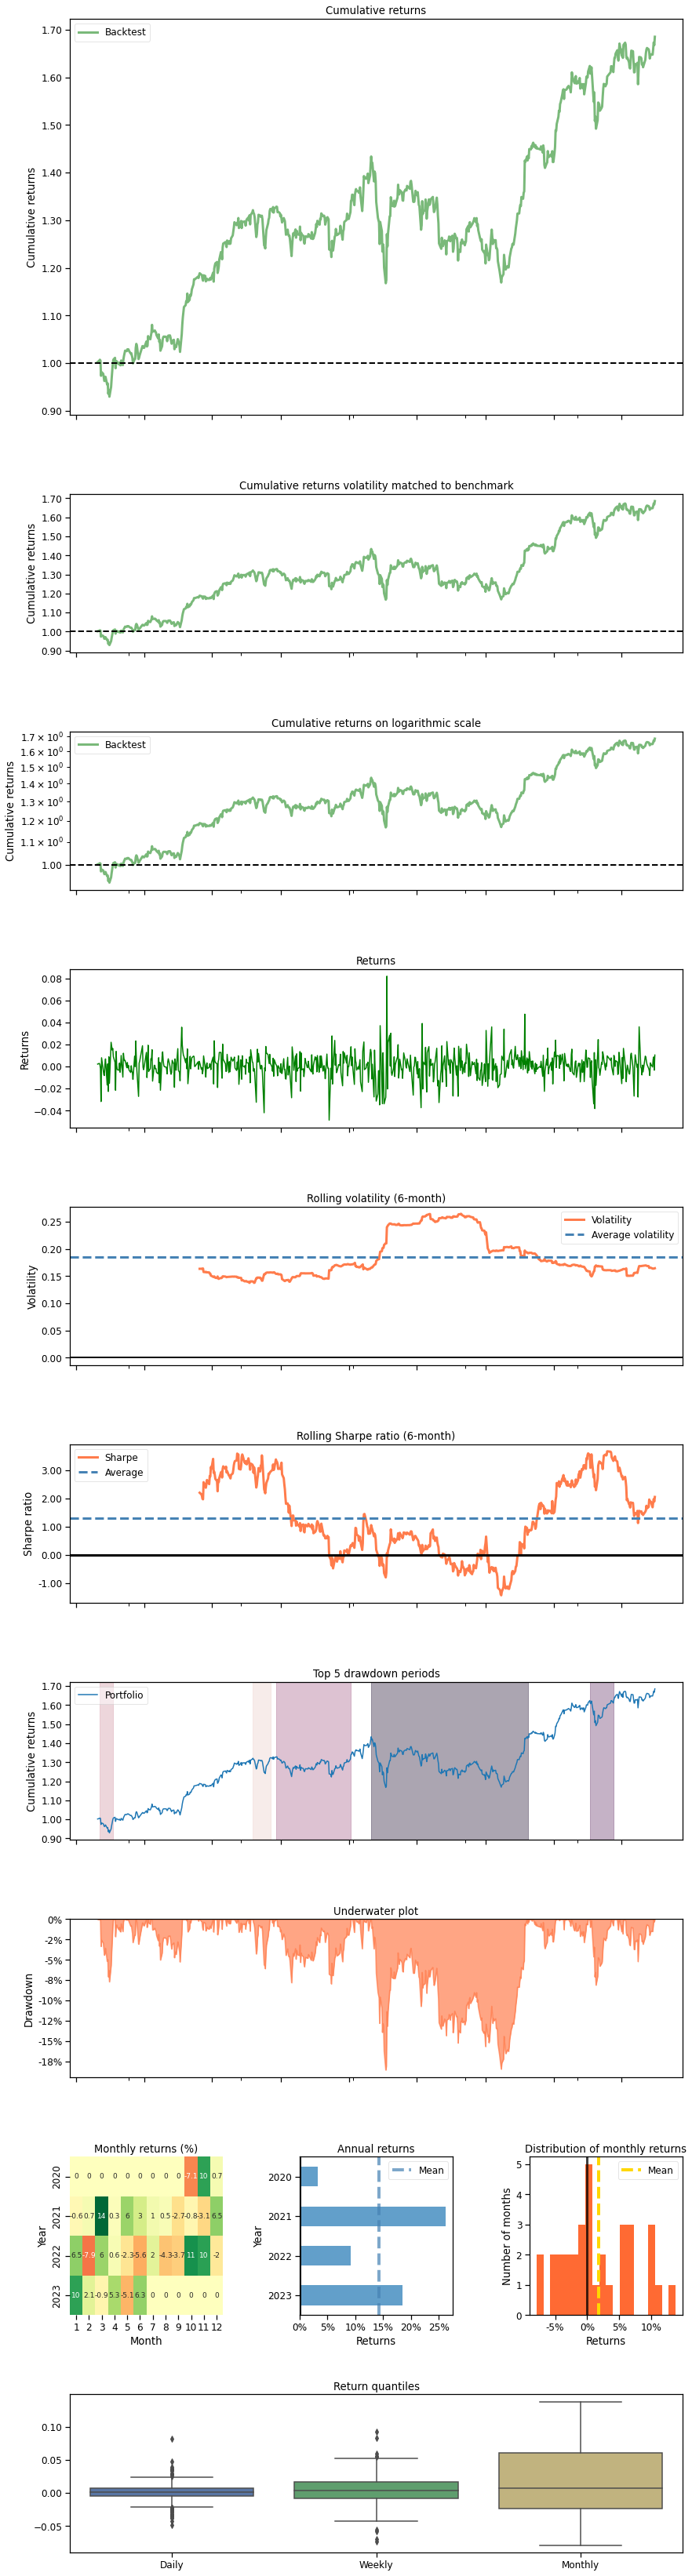

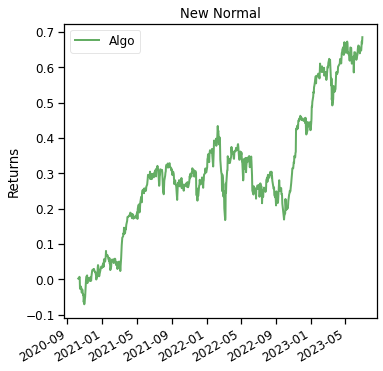

In [42]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_vol_2, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

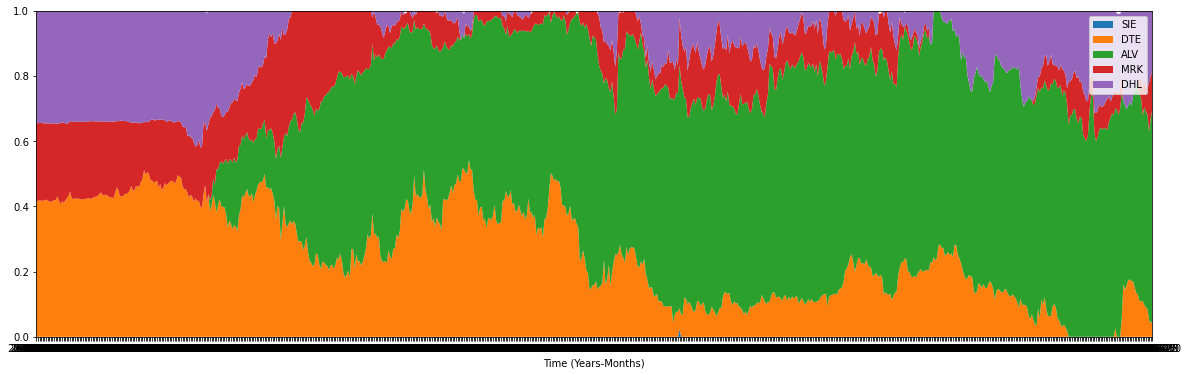

In [43]:
df_plot = pd.DataFrame (portfolio_weights_min_vol_2, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [44]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.0,0.41384,0.00000,0.24046,0.34570
2020-10-12,0.0,0.41722,0.00000,0.23812,0.34466
2020-10-13,0.0,0.41790,0.00000,0.23749,0.34461
2020-10-14,0.0,0.41774,0.00000,0.23803,0.34423
2020-10-15,0.0,0.41655,0.00000,0.23968,0.34377
...,...,...,...,...,...
2023-06-26,0.0,0.09097,0.59922,0.07913,0.23068
2023-06-27,0.0,0.08386,0.59571,0.08326,0.23718
2023-06-28,0.0,0.05156,0.57842,0.15051,0.21952


In [45]:
df_plot.to_csv('RandomForest_min_vol_2.csv', index=True)

# 2 Less features scenario (1 feature)

In [46]:
df1.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [47]:
len(df1)

3449

In [48]:
df1.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [49]:
df1.set_index('Date', inplace=True)
df1

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,109.214657,13.784796,186.687020,124.421818,40.554138,Y
2023-06-27,109.214657,13.784796,186.687020,124.421818,40.554138,Y
2023-06-28,109.214657,13.784796,186.687020,124.421818,40.554138,Y


In [50]:
# Split data set to training set and test set
train = df1.loc[:end_date] # this is actual prices
test = df1.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [51]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,101.696374,13.058188,144.489438,124.421818,40.554138,Y
2020-10-12,102.880375,12.887242,145.887981,124.421818,40.554138,Y
2020-10-13,103.564127,13.121065,145.194028,124.421818,40.554138,Y
2020-10-14,101.800533,13.164107,144.281600,124.421818,40.554138,Y
2020-10-15,103.472087,13.093444,144.182626,124.341635,40.554138,Y
...,...,...,...,...,...,...
2023-06-26,109.214657,13.784796,186.687020,124.421818,40.554138,Y
2023-06-27,109.214657,13.784796,186.687020,124.421818,40.554138,Y
2023-06-28,109.214657,13.784796,186.687020,124.421818,40.554138,Y


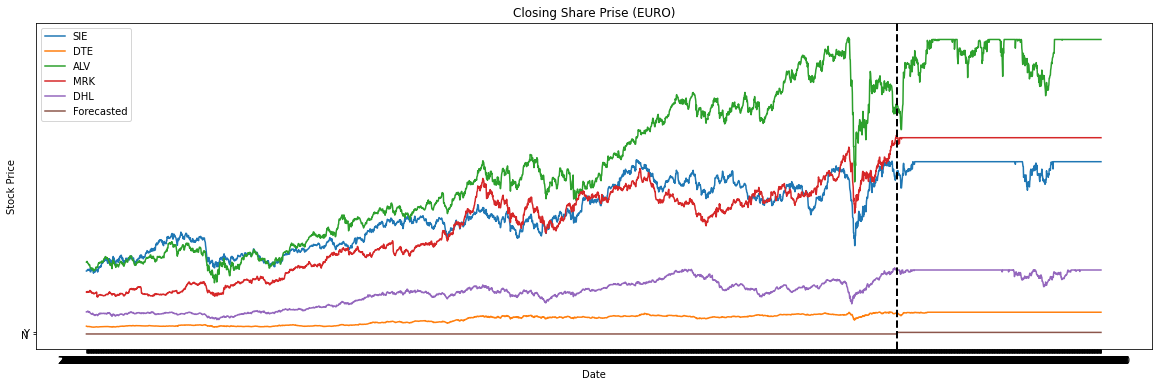

In [52]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df1.columns:
    plt.plot(df1.index, df1[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [53]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df1.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [54]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df1 = df1[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns1 = forecast_returns_df1.iloc[start:]
forecast_returns1 = forecast_returns1.reset_index(drop=True)

In [55]:
forecast_returns1

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,0.000000,0.000000,0.000000,0.000000,0.000000
943,0.000000,0.000000,0.000000,0.000000,0.000000
944,0.000000,0.000000,0.000000,0.000000,0.000000
945,0.000000,0.000000,0.000000,0.000000,0.000000


## 2.1 Maximize the Sharpe ratio

In [56]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_1 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_1.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]
    
    portfolio_weights_min_var_1[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

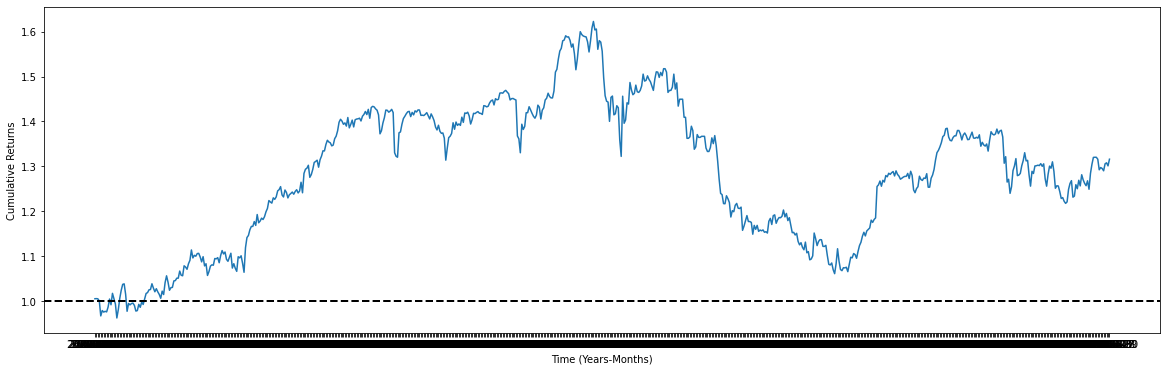

In [57]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_1 = np.sum(actual_returns.multiply(portfolio_weights_min_var_1), axis=1)
cumulative_returns_daily_min_var_1 = (1 + return_stocks_min_var_1).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_1)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [58]:
# Calculate portfolio variance
portfolio_variance_min_var_1 = np.dot(portfolio_weights_min_var_1[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_1[-1]))
portfolio_variance_min_var_1

0.00019117341755845756

In [59]:
# Calculate standard deviation
std_min_var_1 = np.sqrt(portfolio_variance_min_var_1)
std_min_var_1

0.013826547564683584

In [60]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_1[-1]

1.3161446685789553

In [61]:
# Check negative weights
np.any(portfolio_weights_min_var_1 < 0)

False

In [62]:
return_stocks_min_var_1.index = pd.to_datetime(return_stocks_min_var_1.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,10.474%
Cumulative returns,31.614%
Annual volatility,21.778%
Sharpe ratio,0.57
Calmar ratio,0.30
Stability,0.07
Max drawdown,-34.561%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.56,2022-02-09,2022-09-30,NaT,NaN
1,9.45,2021-11-16,2021-11-30,2022-01-04,36
2,8.35,2021-07-12,2021-09-20,2021-10-26,77
3,5.87,2020-11-06,2020-11-10,2020-12-03,20
4,5.38,2020-10-27,2020-10-30,2020-11-04,7


Stress Events,mean,min,max
New Normal,0.05%,-6.29%,10.12%


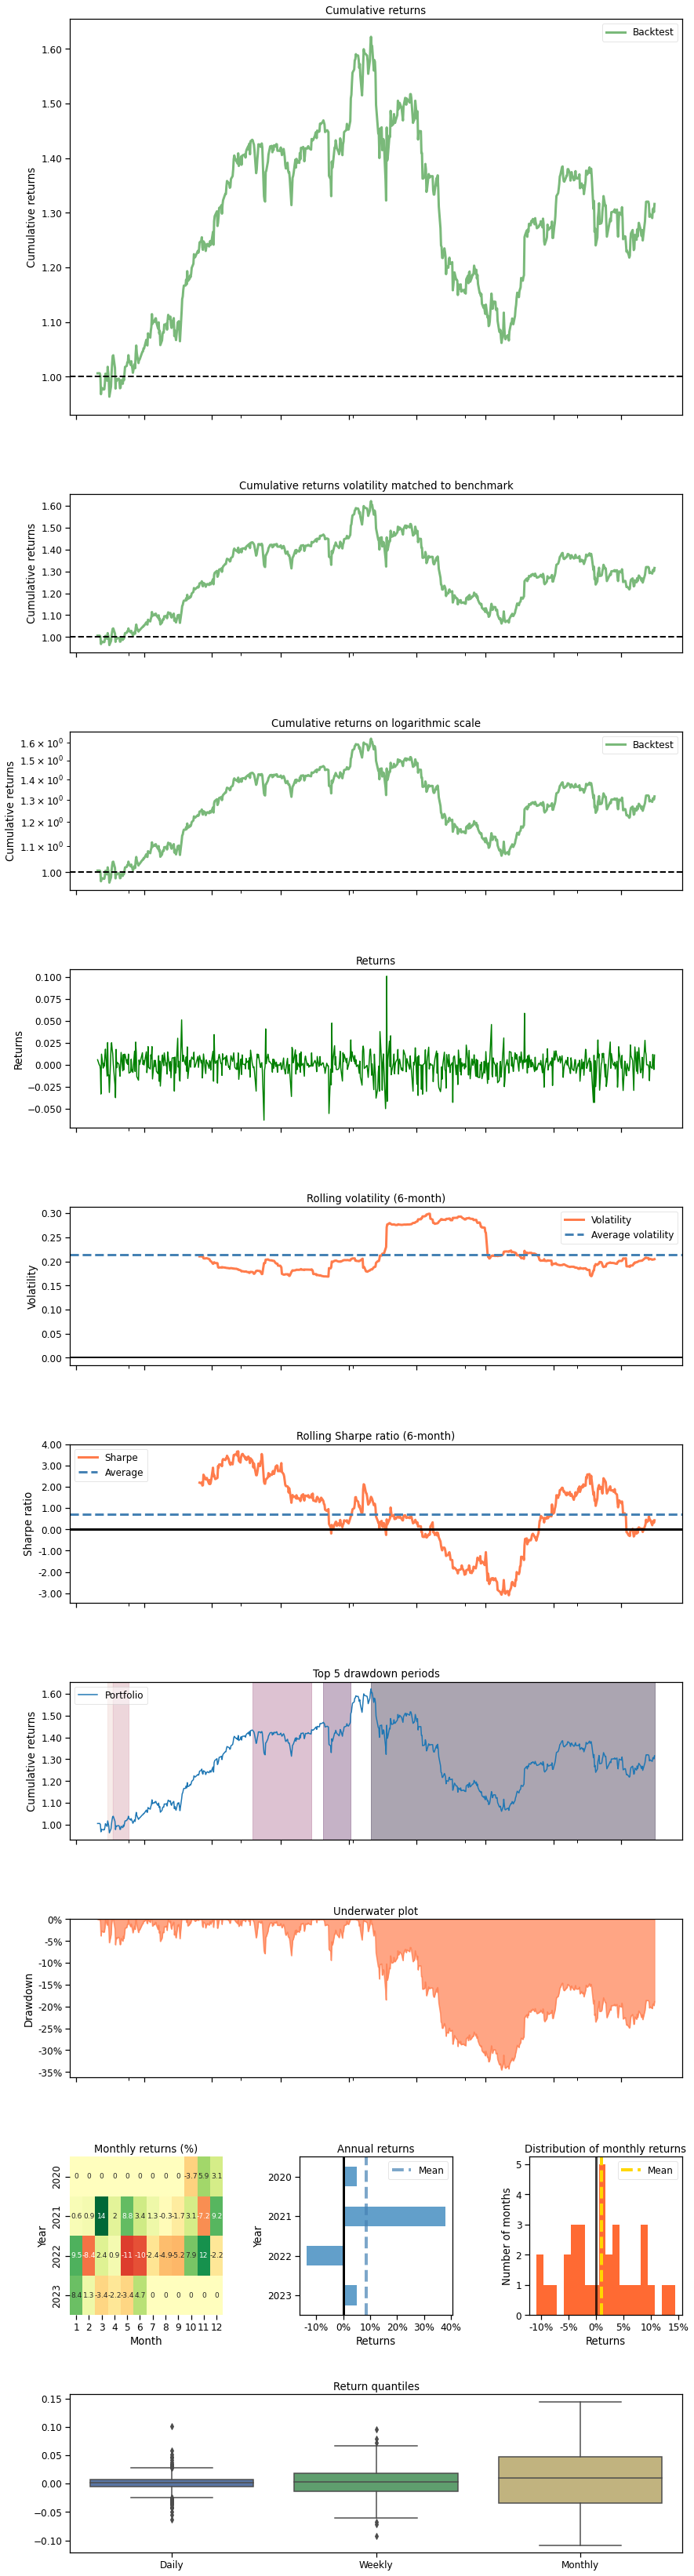

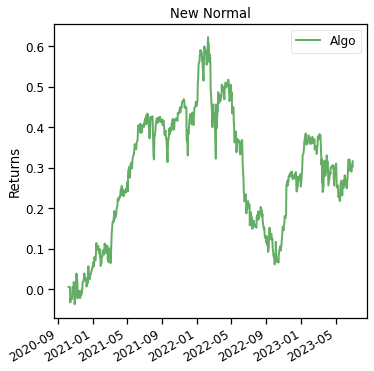

In [63]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_1, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

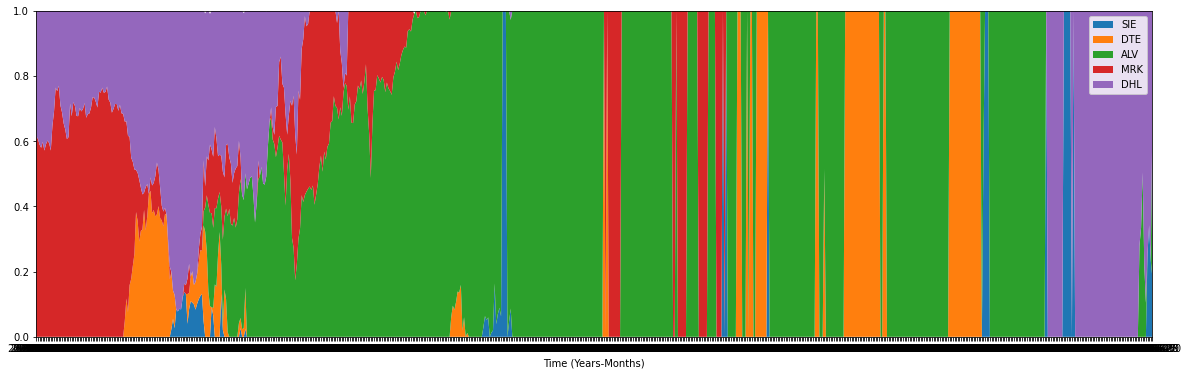

In [64]:
df_plot = pd.DataFrame (portfolio_weights_min_var_1, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [65]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.0,0.00000,0.61518,0.38482
2020-10-12,0.00000,0.0,0.00000,0.60685,0.39315
2020-10-13,0.00000,0.0,0.00000,0.58952,0.41048
2020-10-14,0.00000,0.0,0.00000,0.57936,0.42064
2020-10-15,0.00000,0.0,0.00000,0.59781,0.40219
...,...,...,...,...,...
2023-06-26,0.00000,0.0,0.10432,0.00000,0.89568
2023-06-27,0.25335,0.0,0.00000,0.00000,0.74665
2023-06-28,0.34196,0.0,0.00000,0.00000,0.65804


In [66]:
df_plot.to_csv('RandomForest_min_var_1.csv', index=True)

# 3 More features scenario (3 features)

In [67]:
df3.head()

,Date,SIE,DTE,ALV,MRK,DHL,Forecasted
0,2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980,N
1,2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000,N
2,2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155,N
3,2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125,N
4,2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460,N


In [68]:
len(df3)

3449

In [69]:
df3.isna().sum()

Date          0
SIE           0
DTE           0
ALV           0
MRK           0
DHL           0
Forecasted    0
dtype: int64

In [70]:
df3.set_index('Date', inplace=True)
df3

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2010-01-04,39.892437,4.953136,45.519119,26.576839,13.980000,N
2010-01-05,39.916805,4.911083,45.657921,26.381214,14.000000,N
2010-01-06,40.063042,4.789590,46.012665,26.364910,14.155000,N
2010-01-07,40.538315,4.698472,45.483131,26.919188,14.125000,N
2010-01-08,40.794235,4.724171,45.236355,26.646120,14.460000,N
...,...,...,...,...,...,...
2023-06-26,109.152737,13.749315,186.253781,124.636792,40.517824,Y
2023-06-27,109.152737,13.749315,186.253781,124.636792,40.517824,Y
2023-06-28,109.152737,13.749315,186.253781,124.636792,40.517824,Y


In [71]:
# Split data set to training set and test set
train = df3.loc[:end_date] # this is actual prices
test = df3.loc[test_start_date:] # this is estimated prices which resulted from ML algorithms

In [72]:
test

,SIE,DTE,ALV,MRK,DHL,Forecasted
Date,,,,,,
2020-10-09,101.664251,13.072493,143.885270,124.636792,40.554277,Y
2020-10-12,102.935544,12.904415,144.196509,124.636792,40.554277,Y
2020-10-13,103.501046,13.117576,146.138936,124.636792,40.554277,Y
2020-10-14,102.007121,13.141654,144.652793,124.636792,40.554277,Y
2020-10-15,103.412804,13.100193,144.441025,124.518873,40.554277,Y
...,...,...,...,...,...,...
2023-06-26,109.152737,13.749315,186.253781,124.636792,40.517824,Y
2023-06-27,109.152737,13.749315,186.253781,124.636792,40.517824,Y
2023-06-28,109.152737,13.749315,186.253781,124.636792,40.517824,Y


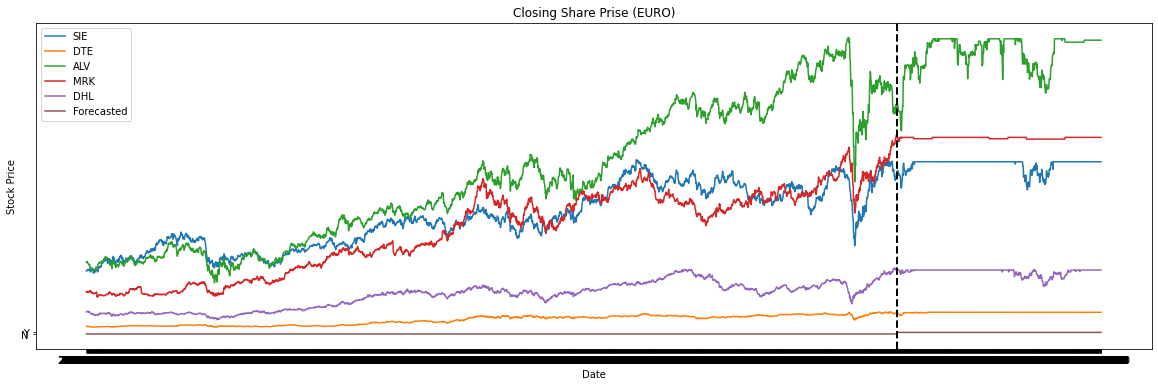

In [73]:
# Plot line chart for each stock
plt.figure(figsize=(20, 6))  # Set the figure size

for column in df3.columns:
    plt.plot(df3.index, df3[column], label=column)

# Add a vertical line at '2020-10-09'
plt.axvline(x='2020-10-09', color='black', linestyle='--', lw=2)

# Configure the plot
plt.title('Closing Share Prise (EURO)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [74]:
# working days in a year 252
# Prices (include actual and estimated) which is used as input to calculate stock covariance
window = 252
start = len(train)-window
data = df3.iloc[start:]
data = data.reset_index(drop=True)
data = data[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']]

In [75]:
# Forecasted returns which is used as input of optimization algorithm
forecast_returns_df3 = df3[['SIE', 'DTE', 'ALV', 'MRK', 'DHL']].pct_change()
forecast_returns3 = forecast_returns_df3.iloc[start:]
forecast_returns3 = forecast_returns3.reset_index(drop=True)

In [76]:
forecast_returns3

,SIE,DTE,ALV,MRK,DHL
0,0.027360,0.009932,0.028723,0.000482,-0.002648
1,0.000504,0.002588,-0.011262,0.002406,0.002186
2,0.007058,0.014585,0.015662,0.008161,0.000156
3,0.008410,-0.000891,-0.001636,0.009524,-0.004829
4,-0.017871,0.008531,0.007957,0.002830,-0.005949
...,...,...,...,...,...
942,0.000000,0.000000,0.000000,0.000000,0.000000
943,0.000000,0.000000,0.000000,0.000000,0.000000
944,0.000000,0.000000,0.000000,0.000000,0.000000
945,0.000000,0.000000,0.000000,0.000000,0.000000


## 3.1 Maximize the Sharpe ratio

In [77]:
# Perform Maximum the Sharpe ratio optimization model to calculate weights (Durall, 2022)
portfolio_weights_min_var_3 = np.zeros([test.shape[0], len(tickers)])

idx=0
for i in range(portfolio_weights_min_var_3.shape[0]):    
    sel = data.iloc[i+1:window+i+1]
    
    mu = expected_returns.mean_historical_return(sel)
    S = risk_models.sample_cov(sel)

    # optimize for max sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
    
    try:
        weights = ef.max_sharpe()
    except:
        weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
            weights_sum_to_one=True)
    weights = ef.clean_weights(cutoff=0.01, rounding=5)
    data.iloc[window+i] = actual_test.iloc[window+i]

    portfolio_weights_min_var_3[idx]=np.array([weights[j] for j in tickers])
    idx +=1

Text(0.5, 0, 'Time (Years-Months)')

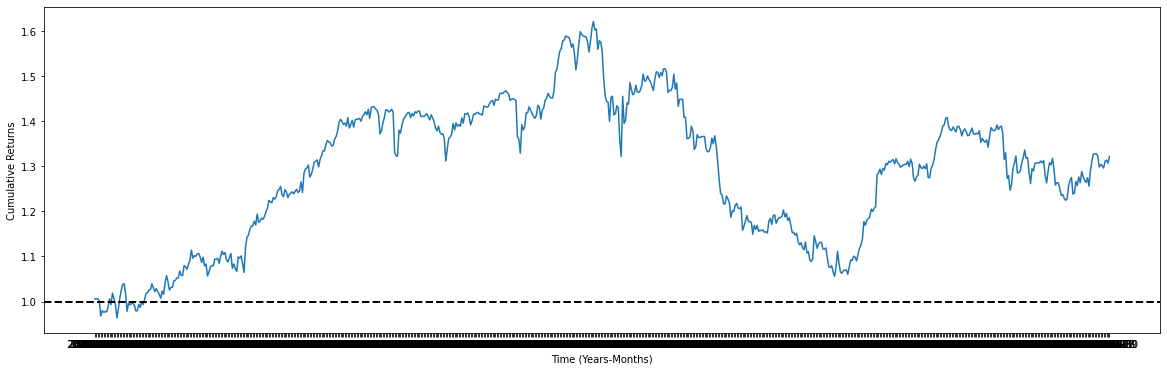

In [78]:
# Calculate porfolio returns from actual returns and resulted weights which is calculated above (Durall, 2022)
return_stocks_min_var_3 = np.sum(actual_returns.multiply(portfolio_weights_min_var_3), axis=1)
cumulative_returns_daily_min_var_3 = (1 + return_stocks_min_var_3).cumprod()
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(cumulative_returns_daily_min_var_3)
plt.axhline(1, color='black', linestyle='--', lw=2)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")

In [79]:
# Calculate portfolio variance
portfolio_variance_min_var_3 = np.dot(portfolio_weights_min_var_3[-1].T, np.dot(np.cov(actual_returns, rowvar=False), portfolio_weights_min_var_3[-1]))
portfolio_variance_min_var_3

0.00019506551632621783

In [80]:
# Calculate standard deviation
std_min_var_3 = np.sqrt(portfolio_variance_min_var_3)
std_min_var_3

0.013966585707545628

In [81]:
# Calculate porfolio returns
cumulative_returns_daily_min_var_3[-1]

1.321894023955414

In [82]:
# Check negative weights
np.any(portfolio_weights_min_var_3 < 0)

False

In [83]:
return_stocks_min_var_3.index = pd.to_datetime(return_stocks_min_var_3.index)

Start date,2020-10-09
End date,2023-06-30
Total months,33
,Backtest
Annual return,10.648%
Cumulative returns,32.189%
Annual volatility,21.897%
Sharpe ratio,0.57
Calmar ratio,0.31
Stability,0.08
Max drawdown,-34.867%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.87,2022-02-09,2022-09-30,NaT,NaN
1,9.46,2021-11-16,2021-11-30,2022-01-04,36
2,8.43,2021-07-12,2021-09-20,2021-10-26,77
3,5.85,2020-11-06,2020-11-10,2020-12-03,20
4,5.42,2020-10-27,2020-10-30,2020-11-04,7


Stress Events,mean,min,max
New Normal,0.05%,-6.25%,10.12%


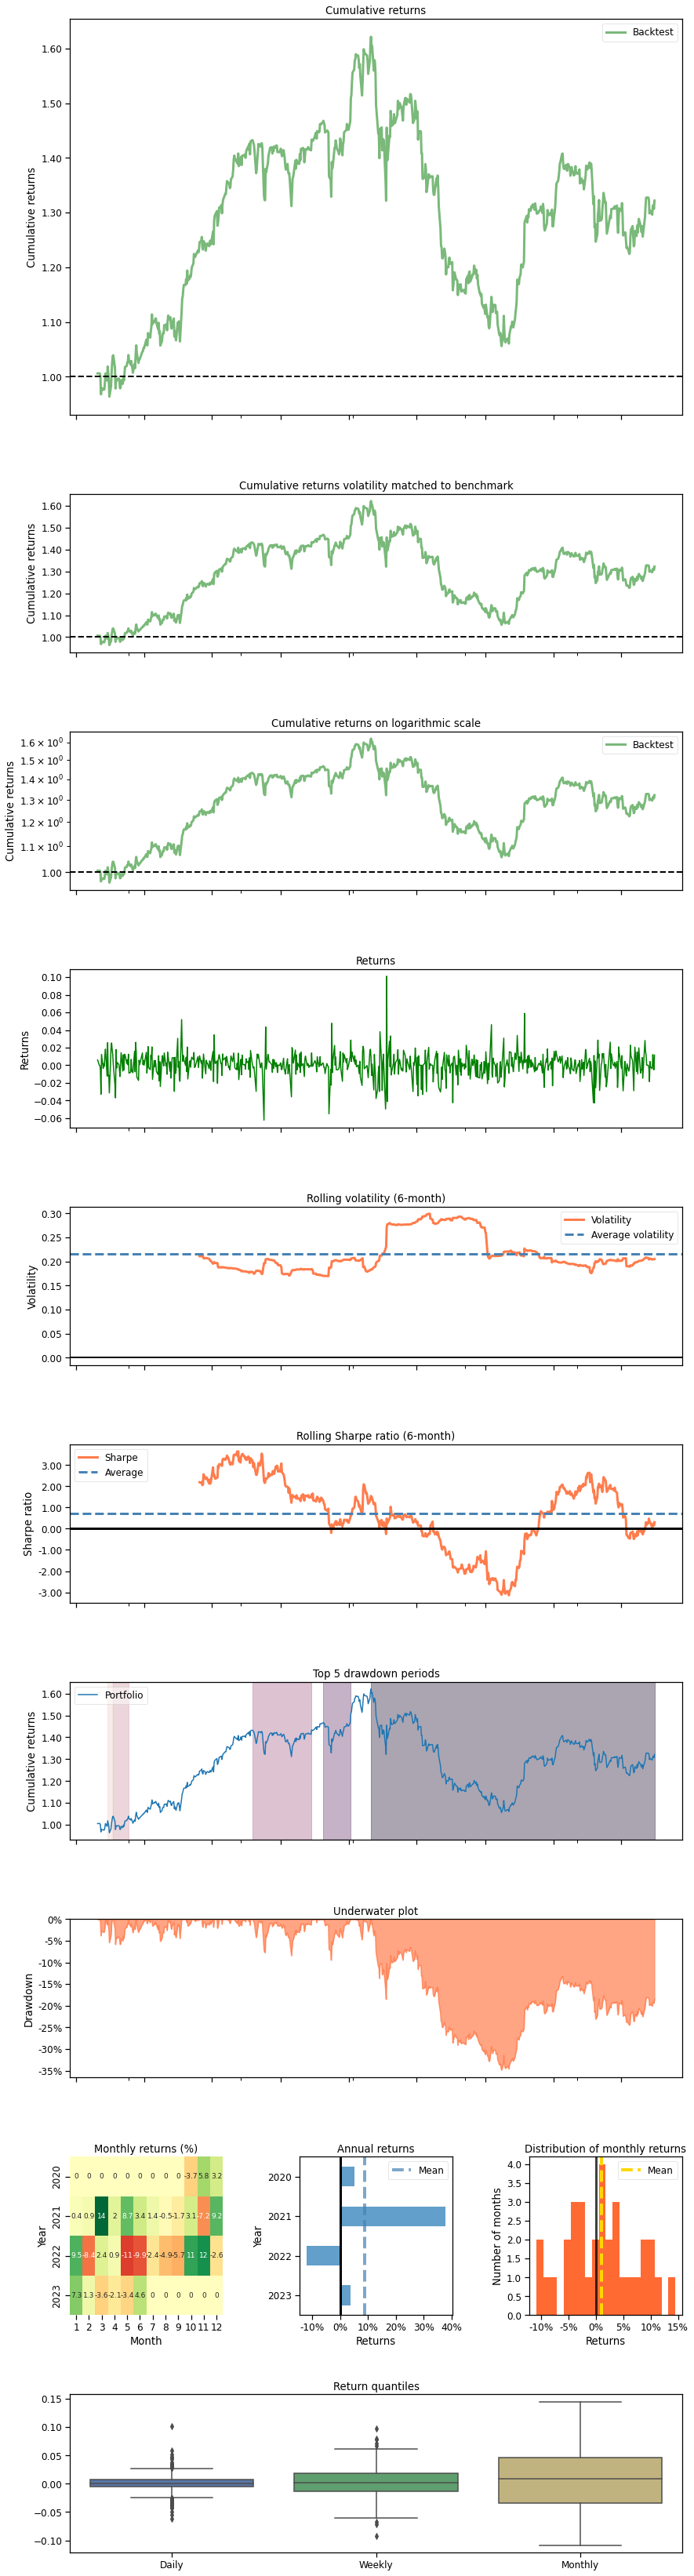

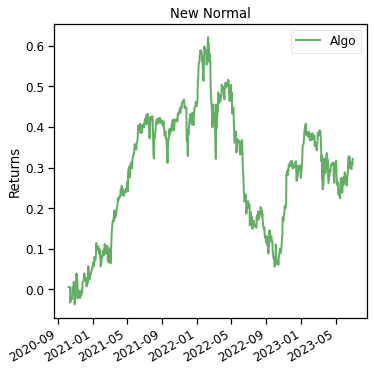

In [84]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = return_stocks_min_var_3, set_context=False)

Text(0.5, 0, 'Time (Years-Months)')

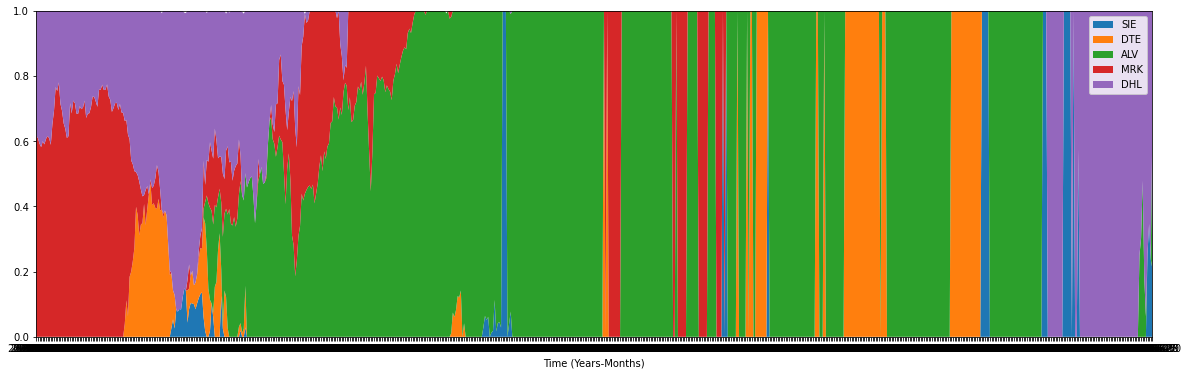

In [85]:
df_plot = pd.DataFrame (portfolio_weights_min_var_3, index = test.index, columns = tickers)
plt.figure(figsize=(20, 6))  # Set the figure size
plt.stackplot(test.index, df_plot['SIE'], df_plot['DTE'], df_plot['ALV'], df_plot['MRK'], df_plot['DHL'], labels=tickers)
plt.legend(loc='upper right')
plt.margins(x=0)
plt.margins(y=0)
plt.xlabel("Time (Years-Months)")

In [86]:
df_plot

,SIE,DTE,ALV,MRK,DHL
Date,,,,,
2020-10-09,0.00000,0.0,0.00000,0.61727,0.38273
2020-10-12,0.00000,0.0,0.00000,0.60906,0.39094
2020-10-13,0.00000,0.0,0.00000,0.59186,0.40814
2020-10-14,0.00000,0.0,0.00000,0.58173,0.41827
2020-10-15,0.00000,0.0,0.00000,0.59956,0.40044
...,...,...,...,...,...
2023-06-26,0.00000,0.0,0.06286,0.00000,0.93714
2023-06-27,0.25582,0.0,0.00000,0.00000,0.74418
2023-06-28,0.34594,0.0,0.00000,0.00000,0.65406


In [87]:
df_plot.to_csv('RandomForest_min_var_3.csv', index=True)

# 4 Summary

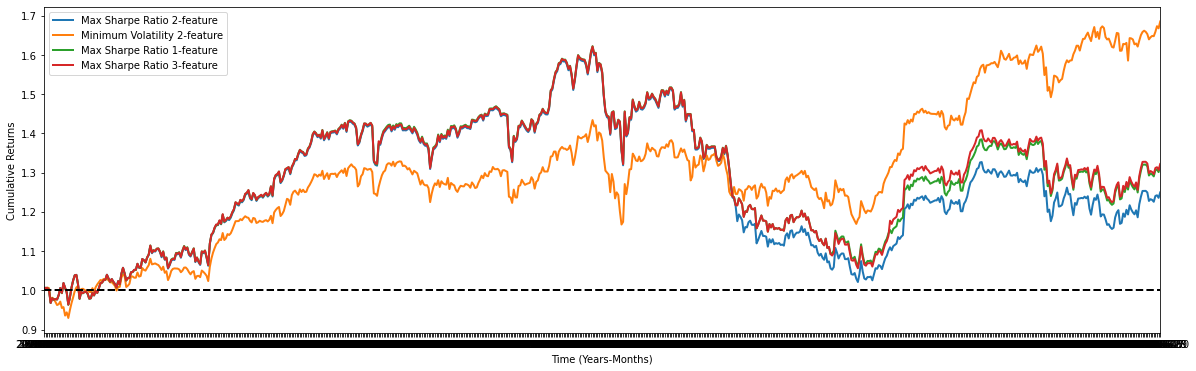

In [88]:
# Plotting all cumulative returns together
x = cumulative_returns_daily_min_var_3.index.values
plt.figure(figsize=(20, 6))  # Set the figure size
plt.plot(x, cumulative_returns_daily_min_var_2, color='tab:blue', label="Max Sharpe Ratio 2-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_vol_2, color='tab:orange', label="Minimum Volatility 2-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_var_1, color='tab:green', label="Max Sharpe Ratio 1-feature", linewidth =2.0)
plt.plot(x, cumulative_returns_daily_min_var_3, color='tab:red', label="Max Sharpe Ratio 3-feature", linewidth =2.0)
plt.axhline(1, color='black', linestyle='--', linewidth =2.0)
plt.margins(x=0)
plt.ylabel("Cumulative Returns")
plt.xlabel("Time (Years-Months)")
plt.legend()

# Bibliography

- Durall, R. (2022). Asset allocation: From markowitz to deep reinforcement learning. _arXiv preprint arXiv:2208.07158._